### Load the modules, classes and configs

In [1]:
import os
import torch 
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize, Resize

from sde import VPSDE
from models.unet import UNet
from loss import get_sde_loss_fn
from configs.config import CFGS
from train import Step_by_Step
from dataset import myDataset

### Setup the stochastic differential equation

In [2]:
# Define the sde
vpsde = VPSDE(N=1500)

### Setup the score model

In [3]:
# Define the models
model_config = CFGS["model"]
model_xy = UNet(**model_config)
model_yx = UNet(**model_config)

models = (model_xy, model_yx)

### Setup the loss function for the model

In [4]:
# Define the loss function
loss_fn = get_sde_loss_fn(sde=vpsde)

### Setup the optimizer

In [5]:
# Define the optimizer
optimizer_xy = optim.Adam(model_xy.parameters(), lr=CFGS["optim"]["lr"], betas=(CFGS["optim"]["beta1"], 0.999), 
                       eps=CFGS["optim"]["eps"], weight_decay=CFGS["optim"]["weight_decay"])

optimizer_yx = optim.Adam(model_yx.parameters(), lr=CFGS["optim"]["lr"], betas=(CFGS["optim"]["beta1"], 0.999), 
                       eps=CFGS["optim"]["eps"], weight_decay=CFGS["optim"]["weight_decay"])

optimizers = (optimizer_xy, optimizer_yx)

### Setup the training

In [6]:
# Instantiate the step by step class
sbs = Step_by_Step(sde=vpsde, models=models, loss_fn=loss_fn, optimizers=optimizers, config=CFGS)

### Load the dataset into dataloaders

In [7]:
dataset_dir = "./datasets/maps"
img_size = CFGS["model"]["image_size"]

transforms = Compose(
    [Resize((img_size, img_size)),
     ToTensor(),
     Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

train_dataset = myDataset(
    root_img= os.path.join(dataset_dir, "train"),
    transform=transforms
)

val_dataset = myDataset(
      root_img= os.path.join(dataset_dir, "val"),
      transform=transforms
)

train_loader = DataLoader(
    train_dataset,
    batch_size=CFGS["training"]["batch_size"],
    num_workers = 4,
    pin_memory=True,
    drop_last=True,
    shuffle=True
)

val_loader = DataLoader(
     val_dataset,
     batch_size=CFGS["training"]["batch_size"],
     num_workers = 4,
     pin_memory=True
)

In [8]:
# Set the data loaders
sbs.set_loaders(train_loader=train_loader, val_loader=val_loader)
#sbs.set_tensorboard("train")

## Continue training the model/ load the trained model

In [9]:
# Load the model from the previous checkpoint
sbs.load_checkpoint("./checkpoints/checkpoint.pth")

In [10]:
sbs.train(4001)

Val Epoch: 3101: 100%|██████████| 16/16 [00:01<00:00, 12.22batch/s]


Epochs Completed: 3101
Current Time: 22:12:07


Val Epoch: 3201: 100%|██████████| 16/16 [00:01<00:00, 12.27batch/s]


Epochs Completed: 3201
Current Time: 22:54:22


Val Epoch: 3301: 100%|██████████| 16/16 [00:01<00:00, 12.33batch/s]


Epochs Completed: 3301
Current Time: 23:36:43


Val Epoch: 3401: 100%|██████████| 16/16 [00:01<00:00, 11.87batch/s]


Epochs Completed: 3401
Current Time: 00:19:05


Val Epoch: 3501: 100%|██████████| 16/16 [00:01<00:00, 11.58batch/s]


Epochs Completed: 3501
Current Time: 01:01:23


Val Epoch: 3601: 100%|██████████| 16/16 [00:01<00:00, 12.19batch/s]


Epochs Completed: 3601
Current Time: 01:43:47


Val Epoch: 3701: 100%|██████████| 16/16 [00:01<00:00, 11.68batch/s]


Epochs Completed: 3701
Current Time: 02:26:08


Val Epoch: 3801: 100%|██████████| 16/16 [00:01<00:00, 12.23batch/s]


Epochs Completed: 3801
Current Time: 03:08:27


Val Epoch: 3901: 100%|██████████| 16/16 [00:01<00:00, 12.24batch/s]


Epochs Completed: 3901
Current Time: 03:50:48


Val Epoch: 4001: 100%|██████████| 16/16 [00:01<00:00, 11.52batch/s]


Epochs Completed: 4001
Current Time: 04:33:54


In [11]:
sbs.train(5001)

Val Epoch: 4101: 100%|██████████| 16/16 [00:01<00:00, 11.49batch/s]


Epochs Completed: 4101
Current Time: 05:17:31


Val Epoch: 4201: 100%|██████████| 16/16 [00:01<00:00, 11.42batch/s]


Epochs Completed: 4201
Current Time: 06:00:50


Val Epoch: 4301: 100%|██████████| 16/16 [00:01<00:00, 11.42batch/s]


Epochs Completed: 4301
Current Time: 06:44:03


Val Epoch: 4401: 100%|██████████| 16/16 [00:01<00:00, 11.65batch/s]


Epochs Completed: 4401
Current Time: 07:27:26


Val Epoch: 4501: 100%|██████████| 16/16 [00:01<00:00, 11.52batch/s]


Epochs Completed: 4501
Current Time: 08:10:48


Val Epoch: 4601: 100%|██████████| 16/16 [00:01<00:00, 12.04batch/s]


Epochs Completed: 4601
Current Time: 08:53:20


Val Epoch: 4701: 100%|██████████| 16/16 [00:01<00:00, 11.53batch/s]


Epochs Completed: 4701
Current Time: 09:35:42


Val Epoch: 4801: 100%|██████████| 16/16 [00:01<00:00, 11.65batch/s]


Epochs Completed: 4801
Current Time: 10:18:02


Val Epoch: 4901: 100%|██████████| 16/16 [00:01<00:00, 11.25batch/s]


Epochs Completed: 4901
Current Time: 11:00:25


Val Epoch: 5001: 100%|██████████| 16/16 [00:01<00:00, 11.69batch/s]


Epochs Completed: 5001
Current Time: 11:43:03


## Plot the training and validation losses

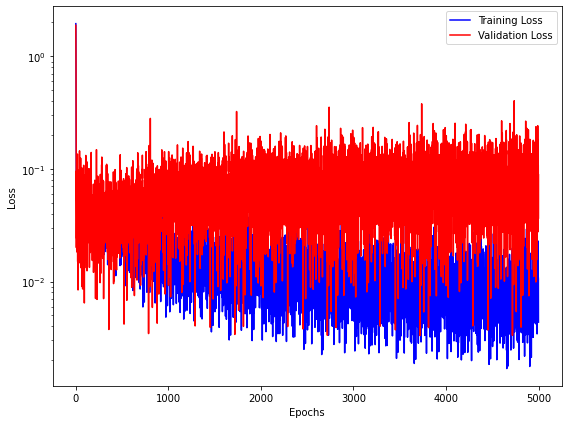

In [10]:
sbs.plot_losses()

In [11]:
sbs.losses[-1]

0.004357964620112398

## Generate the samples

In [33]:
test_dataset = myDataset(
    root_img= os.path.join(dataset_dir, "test"),
    transform=transforms
)

test_loader = DataLoader(test_dataset, shuffle=True, batch_size=1)

In [34]:
x, y = next(iter(test_loader))

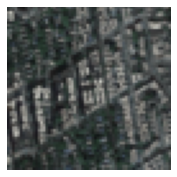

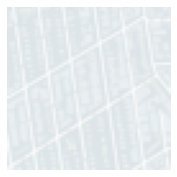

In [35]:
sbs.plot_samples(x)
sbs.plot_samples(y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


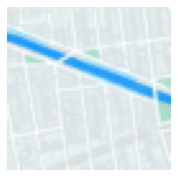

In [26]:
sample_y = sbs.translate(target_domain="y", condition=x, num_steps=1500)
sbs.plot_samples(sample_y)

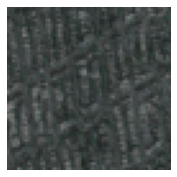

In [36]:
sample_x = sbs.translate(target_domain="x", condition=y, num_steps=1500)
sbs.plot_samples(sample_x)